In [33]:
import xarray as xr # for data handling
import numpy as np # for maths
import matplotlib as mpl # plotlibrary
import matplotlib.pyplot as plt # for the plots 
from matplotlib.patches import Rectangle
from matplotlib.colors import LogNorm # for making a log 10 colorscale
import cartopy # library for making maps
from cartopy import crs as ccrs # Projection Library
from cartopy.crs import Stereographic, PlateCarree, Mollweide # Map projections I use00
from cartopy.feature import LAND, COASTLINE # Vectordata of the Coastline and land for making the maps prettier
import cmocean
from glob import glob
import dask
from scipy.io import loadmat
from scipy.integrate import quad
import gsw


# Exercise 1

Caluclate buoyancy A(z) = gp(z)/p_o m/s^2 

Depth = z

Density profile p(z) -> p is rho

g is gravity?

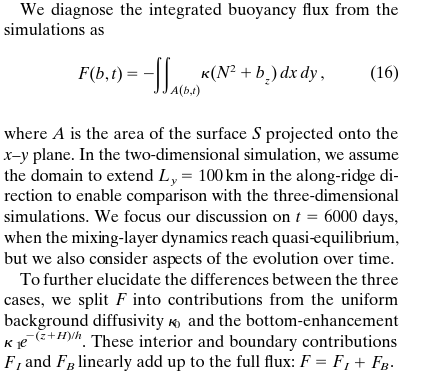
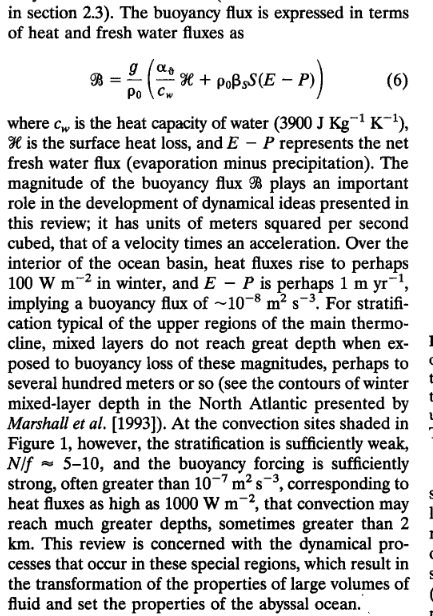

None


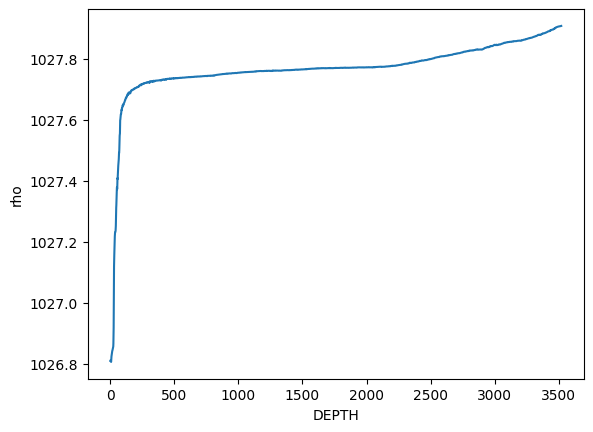

In [ ]:
rho0 = 1025.0          # reference density [kg m^-3]
grav = 9.80665         # m/s2

profile = loadmat("Labrador3.mat").get("rho").T[0]
depths = loadmat("Labrador3.mat").get("z").T[0]

print(profile)

rho_profile = xr.Dataset(
    data_vars=dict(
        rho=(["DEPTH"], profile),
        ),
    coords=dict(
        depth=("DEPTH", depths),
    ),
)
rho_profile.rho.plot()

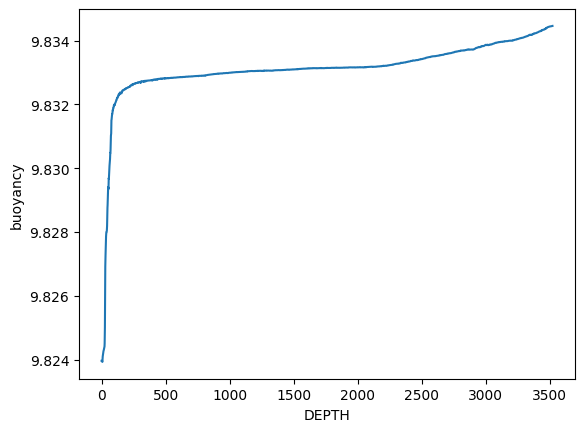

In [77]:
a_profile = rho_profile.assign(buoyancy=grav*rho_profile["rho"]/rho0)
a_profile.buoyancy.plot()

Buoyancy mostly stabilizes by 200m, fully at 500m

Integrate A from 0 to [0, 500]

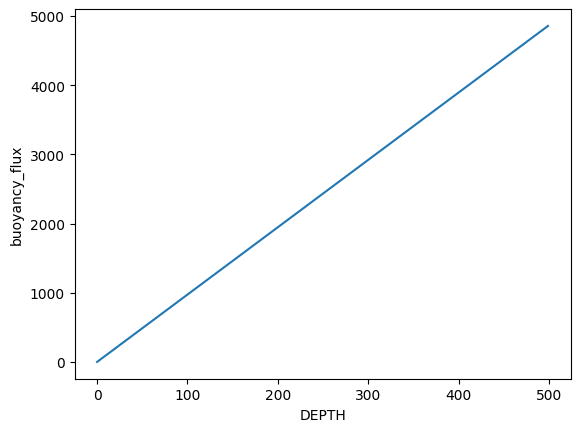

In [94]:
flux_profile = rho_profile.assign(buoyancy_flux=a_profile["buoyancy"]*a_profile["depth"])
flux_profile.sel(DEPTH=slice(0, 500)).buoyancy_flux.plot()

In [ ]:
## DELETE IF ABOVE WORKS

# def integrand(z):
#     return a_profile.sel(DEPTH=slice(0, z)).buoyancy.data[-1]**2/2

# def flux(depth):
#     return quad(integrand, 0, depth)

# print(a_profile.sel(DEPTH=slice(0, 200)).buoyancy.data[-1])
# # print(a_profile["depth"])
# fluxes = []
# depths = []
# d_to_integrate = a_profile.sel(DEPTH=slice(0,500))
# print(d_to_integrate)
# for b in d_to_integrate["depth"]:

#     print(flux(b))

# print(a_profile.DEPTH)

# a_profile = a_profile.assign(buoy_flux=fluxes(a_profile["DEPTH"]))

# a_profile = a_profile.assign(buoy_flux=quad(integrand, 0, a_profile["DEPTH"])[0])
# a_profile.buoyancy.plot()

# buoyancy_flux = a_profile.buoyancy.sel(DEPTH=slice(0,500)).integrate(coord="DEPTH")
# print(buoyancy_flux)
# buoyancy_flux.plot()


In [ ]:
## part b